In [6]:
import numpy as np 
import pandas as pd 
import os

In [7]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [8]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [9]:
X_train =[]
Y_train= []
image_size = 150
labels = ['glioma','meningioma','notumor','pituitary']
for i in labels:
    folderPath = os.path.join('C:/Users/Ayan Kanti Das/OneDrive/Desktop/brain/archive/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
        
for i in labels:
    folderPath = os.path.join('C:/Users/Ayan Kanti Das/OneDrive/Desktop/brain/archive/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)  
        
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [10]:
X_train,Y_train = shuffle(X_train, Y_train , random_state=101)

In [11]:
X_train, X_test,y_train,y_test = train_test_split(X_train, Y_train, test_size=0.1 , random_state=101) 

In [12]:
y_train_new =[]
for i in y_train :
    y_train_new.append(labels.index(i))
    
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

# now do the same for test

y_test_new =[]
for i in y_test :
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [13]:
model = Sequential()
# this model is inspired by VGG 16
# layer1
model.add(Conv2D(32, (3,3), activation='relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3) , activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3) , activation='relu'))
model.add(Conv2D(64,(3,3) , activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3) , activation='relu'))
model.add(Conv2D(128,(3,3) , activation='relu'))
model.add(Conv2D(128,(3,3) , activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3) , activation='relu'))
model.add(Conv2D(256,(3,3) , activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])

In [16]:
history = model.fit(X_train, y_train , epochs=20 , validation_split=0.1)

Epoch 1/20
178/178 [==============================] - 342s 2s/step - loss: 1.4155 - accuracy: 0.4522 - val_loss: 0.8919 - val_accuracy: 0.6218
Epoch 2/20
178/178 [==============================] - 341s 2s/step - loss: 0.7309 - accuracy: 0.6862 - val_loss: 0.8637 - val_accuracy: 0.6203
Epoch 3/20
178/178 [==============================] - 343s 2s/step - loss: 0.5696 - accuracy: 0.7632 - val_loss: 0.6537 - val_accuracy: 0.7152
Epoch 4/20
178/178 [==============================] - 339s 2s/step - loss: 0.4790 - accuracy: 0.8056 - val_loss: 0.6340 - val_accuracy: 0.7468
Epoch 5/20
178/178 [==============================] - 337s 2s/step - loss: 0.4096 - accuracy: 0.8330 - val_loss: 0.5782 - val_accuracy: 0.7611
Epoch 6/20
178/178 [==============================] - 337s 2s/step - loss: 0.3677 - accuracy: 0.8465 - val_loss: 0.7280 - val_accuracy: 0.7373
Epoch 7/20
178/178 [==============================] - 338s 2s/step - loss: 0.3055 - accuracy: 0.8759 - val_loss: 1.0015 - val_accuracy: 0.7136

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

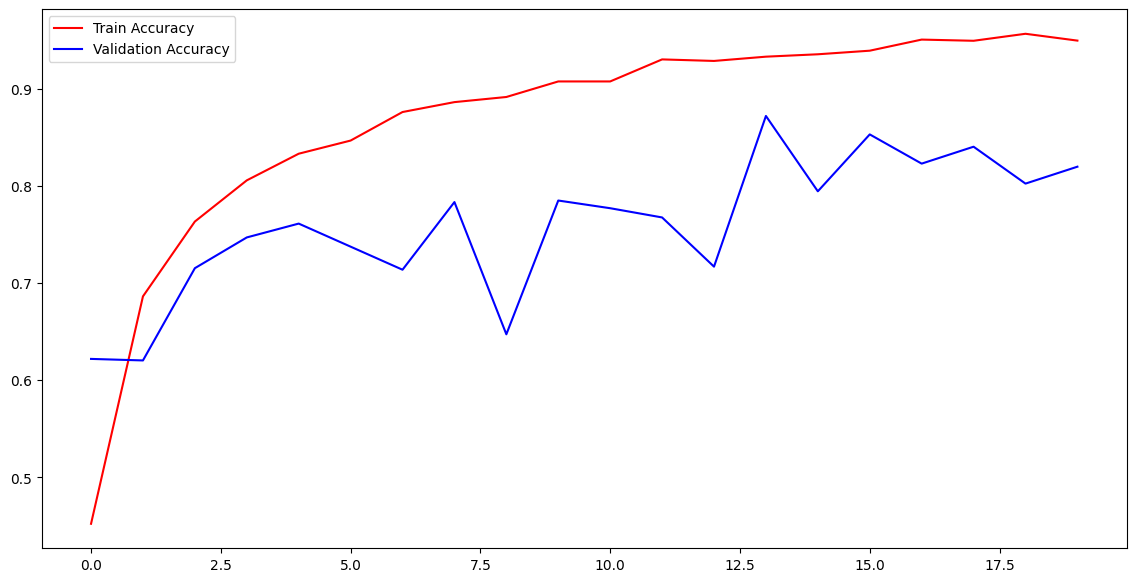

In [18]:
model.save('braintumorvgg16.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14, 7))
plt.plot(epochs, acc, 'r' , label="Train Accuracy")
plt.plot(epochs, val_acc, 'b' , label="Validation Accuracy")
plt.legend(loc = 'upper left')
plt.show()

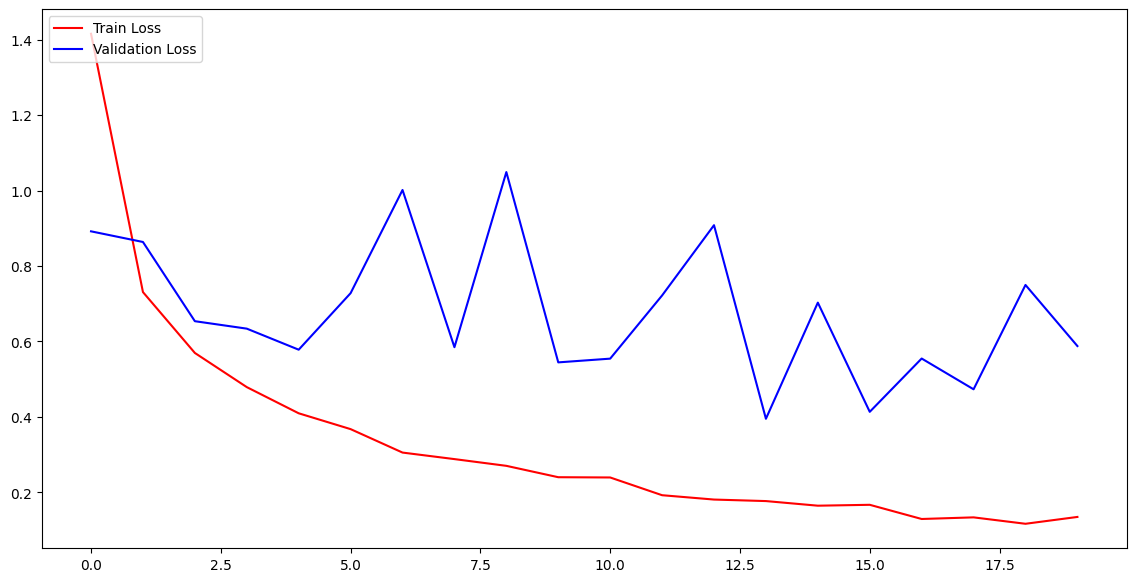

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14, 7))
plt.plot(epochs, loss, 'r' , label="Train Loss")
plt.plot(epochs, val_loss, 'b' , label="Validation Loss")
plt.legend(loc = 'upper left')
plt.show()

In [24]:
img = cv2.imread('5 no.jpg')

img = cv2.resize(img, (150, 150))

img_array = np.array(img)

img_array.shape

(150, 150, 3)

In [25]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

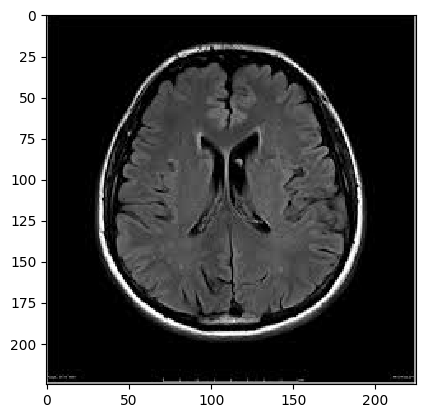

In [26]:
from tensorflow.keras.preprocessing import image
img = image.load_img('5 no.jpg')
plt.imshow(img, interpolation='nearest')

In [27]:
ans = model.predict(img_array)
indices = ans.argmax()

if indices == 0 :
    print("Glioma Tumor Found")
elif indices == 1:
    print("Meningioma Tumor Found")
elif indices == 2:
    print("No Tumor Found")
elif indices == 3:
    print("Pituitary Tumor Found")

1/1 [==============================] - 0s 51ms/step
No Tumor Found
